In [1]:
import math
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd

In [2]:
openbiodf = pd.read_csv("/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/Llama3-OpenBioLLM-70B/Llama3-OpenBioLLM-70B_saq_base-prompt_0shot_score-0.8533_1500.csv")
mixtraldf = pd.read_csv("/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/Mixtral-8x7B-Instruct-v0.1/Mixtral-8x7B-Instruct-v0.1_saq_base-prompt_0shot_score-0.8691_1500.csv")
gpt4 = pd.read_csv("/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/gpt-4/gpt-4_saq_base-prompt_0shot_score-0.8732_1500.csv")
gpt3_5 = pd.read_csv("/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/gpt-3.5-turbo/gpt-3.5-turbo_saq_base-prompt_0shot(s)_score-0.2968_1500.csv")


In [3]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return len(s1.intersection(s2)) / len(s1.union(s2))

In [4]:
def tokenize(str_input):
    return set(str_input.lower().split())

# Compute Overlap Coefficient
def overlap_similarity(s1, s2):

    set1 = tokenize(s1)
    set2 = tokenize(s2)
    
    intersection = set1.intersection(set2)
    
    # Compute the overlap similarity
    overlap_sim = len(intersection) / min(len(set1), len(set2))
    
    return overlap_sim


In [5]:
import nltk
from collections import Counter
nltk.data.path[0]="/srv/essa-lab/flash3/cnimo3/work/reproduction/PMC-LLaMA/consistency/nltk_data"
nltk.download('punkt', download_dir="/srv/essa-lab/flash3/cnimo3/work/reproduction/PMC-LLaMA/consistency/nltk_data")
nltk.download('stopwords', download_dir="/srv/essa-lab/flash3/cnimo3/work/reproduction/PMC-LLaMA/consistency/nltk_data")
import os
os.environ["NLTK_DATA "] = "/srv/essa-lab/flash3/cnimo3/work/reproduction/PMC-LLaMA/consistency/nltk_data"

[nltk_data] Downloading package punkt to /srv/essa-
[nltk_data]     lab/flash3/cnimo3/work/reproduction/PMC-
[nltk_data]     LLaMA/consistency/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /srv/essa-
[nltk_data]     lab/flash3/cnimo3/work/reproduction/PMC-
[nltk_data]     LLaMA/consistency/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
def preprocess(str_input):
    str_input = str_input.lower()
    # Remove punctuation
    str_input = str_input.translate(str.maketrans('', '', string.punctuation))
    #tokenize
    tokens = word_tokenize(str_input)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return set(tokens)


In [7]:
# Similar to Overlap Coefficient, Compute Dice Coefficient
def dice_similarity(text1, text2):
    # Preprocess texts
    set1 = preprocess(text1)
    set2 = preprocess(text2)
    
    # Compute the intersection of the sets
    intersection = set1.intersection(set2)
    
    # Compute the Dice similarity
    dice_sim = 2 * len(intersection) / (len(set1) + len(set2))
    
    return dice_sim

In [8]:
jaccard_score = jaccard_similarity(gpt4.iloc[3]['outputs'], gpt4.iloc[3]['rationale'],)
print(jaccard_score)


0.7142857142857143


In [9]:
jaccard_similarities = []
for output, rationale in zip(gpt4['outputs'], gpt4['rationale']):
    similarity = jaccard_similarity(output, rationale)
    jaccard_similarities.append(similarity)

gpt4['jaccard_similarity'] = jaccard_similarities

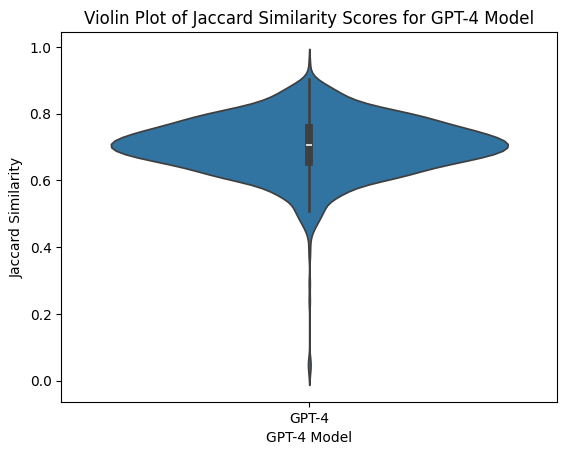

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "Model": ["GPT-4"] * len(gpt4['jaccard_similarity']),
    "Jaccard Similarity": gpt4['jaccard_similarity']
}


sns.violinplot(x="Model", y="Jaccard Similarity", data=data)
plt.xlabel('GPT-4 Model')
plt.ylabel('Jaccard Similarity')
plt.title('Violin Plot of Jaccard Similarity Scores for GPT-4 Model')
plt.show()

In [11]:
# Do the Same for OpenBioLLM
jaccard_similarities = []
for output, rationale in zip(openbiodf['outputs'], openbiodf['rationale']):
    similarity = jaccard_similarity(output, rationale)
    jaccard_similarities.append(similarity)

openbiodf['jaccard_similarity'] = jaccard_similarities
openbiodf['jaccard_similarity']

0       0.464286
1       0.765957
2       0.448276
3       0.925926
4       0.657895
          ...   
1495    0.281250
1496    0.236842
1497    0.866667
1498    0.583333
1499    0.230769
Name: jaccard_similarity, Length: 1500, dtype: float64

In [12]:
# Do the Same for OpenBioLLM
jaccard_similarities = []
for output, rationale in zip(openbiodf['outputs'], openbiodf['rationale']):
    similarity = jaccard_similarity(output, rationale)
    jaccard_similarities.append(similarity)

openbiodf['jaccard_similarity'] = jaccard_similarities
openbiodf['jaccard_similarity']

0       0.464286
1       0.765957
2       0.448276
3       0.925926
4       0.657895
          ...   
1495    0.281250
1496    0.236842
1497    0.866667
1498    0.583333
1499    0.230769
Name: jaccard_similarity, Length: 1500, dtype: float64

In [13]:
# Another one - Mixtral
jaccard_similarities = []
for output, rationale in zip(mixtraldf['outputs'], mixtraldf['rationale']):
    similarity = jaccard_similarity(output, rationale)
    jaccard_similarities.append(similarity)

mixtraldf['jaccard_similarity'] = jaccard_similarities
mixtraldf['jaccard_similarity']

0       0.702703
1       0.825000
2       0.692308
3       0.757576
4       0.722222
          ...   
1495    0.636364
1496    0.729167
1497    0.658537
1498    0.717391
1499    0.722222
Name: jaccard_similarity, Length: 1500, dtype: float64

In [14]:
# And ... Another one - GPT3.5
jaccard_similarities = []
for output, rationale in zip(gpt3_5['outputs'], gpt3_5['rationale']):
    similarity = jaccard_similarity(output, rationale)
    jaccard_similarities.append(similarity)

gpt3_5['jaccard_similarity'] = jaccard_similarities
gpt3_5['jaccard_similarity']

0       0.787879
1       0.837209
2       0.750000
3       0.781250
4       0.742857
          ...   
1495    0.717949
1496    0.850000
1497    0.742857
1498    0.780488
1499    0.694444
Name: jaccard_similarity, Length: 1500, dtype: float64

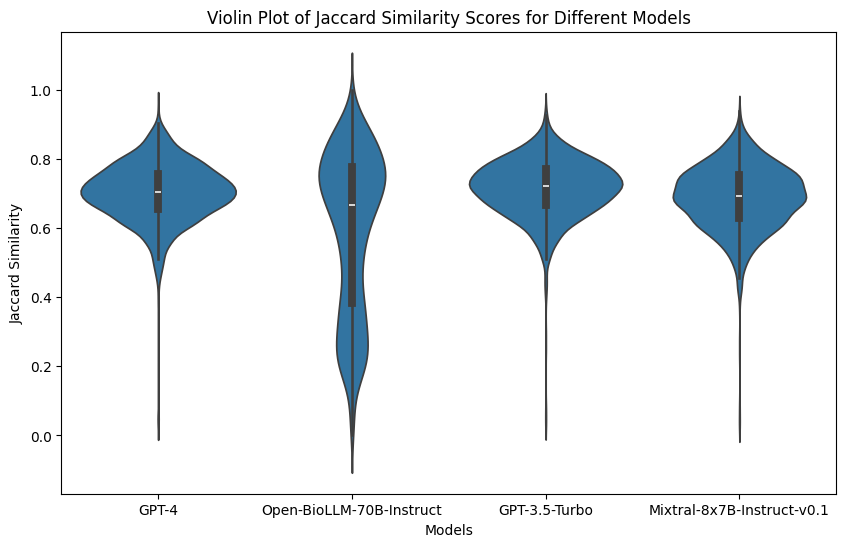

In [15]:
model_data = {
    "Model": ["GPT-4"] * len(gpt4['jaccard_similarity']) + ["Open-BioLLM-70B-Instruct"] * len(openbiodf['jaccard_similarity']) + ["GPT-3.5-Turbo"] * len(gpt3_5['jaccard_similarity']) + ["Mixtral-8x7B-Instruct-v0.1"] * len(mixtraldf['jaccard_similarity']),
    "Jaccard Similarity": list(gpt4['jaccard_similarity']) + list(openbiodf['jaccard_similarity']) + list(gpt3_5['jaccard_similarity']) + list(mixtraldf['jaccard_similarity'])
}


plt.figure(figsize=(10, 6))
sns.violinplot(x="Model", y="Jaccard Similarity", data=model_data)
plt.xlabel('Models')
plt.ylabel('Jaccard Similarity')
plt.title('Violin Plot of Jaccard Similarity Scores for Different Models')
plt.show()

In [16]:
overlap_similarities = []
for output, rationale in zip(mixtraldf['outputs'], mixtraldf['rationale']):
    similarity = overlap_similarity(output, rationale)
    overlap_similarities.append(similarity)

mixtraldf['overlap_coefficient'] = overlap_similarities
mixtraldf['overlap_coefficient']



overlap_similarities = []
for output, rationale in zip(gpt3_5['outputs'], gpt3_5['rationale']):
    similarity = overlap_similarity(output, rationale)
    overlap_similarities.append(similarity)

gpt3_5['overlap_coefficient'] = overlap_similarities
gpt3_5['overlap_coefficient']



overlap_similarities = []
for output, rationale in zip(openbiodf['outputs'], openbiodf['rationale']):
    similarity = overlap_similarity(output, rationale)
    overlap_similarities.append(similarity)

openbiodf['overlap_coefficient'] = overlap_similarities
openbiodf['overlap_coefficient']


overlap_similarities = []
for output, rationale in zip(gpt4['outputs'], gpt4['rationale']):
    similarity = overlap_similarity(output, rationale)
    overlap_similarities.append(similarity)

gpt4['overlap_coefficient'] = overlap_similarities
gpt4['overlap_coefficient']

0       0.689655
1       0.425000
2       0.454545
3       0.809524
4       0.550000
          ...   
1495    0.500000
1496    0.447368
1497    0.625000
1498    0.512195
1499    0.413793
Name: overlap_coefficient, Length: 1500, dtype: float64

In [17]:
dice_similarities = []
for output, rationale in zip(mixtraldf['outputs'], mixtraldf['rationale']):
    similarity = dice_similarity(output, rationale)
    dice_similarities.append(similarity)

mixtraldf['dice_coefficient'] = dice_similarities
mixtraldf['dice_coefficient']



dice_similarities = []
for output, rationale in zip(gpt3_5['outputs'], gpt3_5['rationale']):
    similarity = dice_similarity(output, rationale)
    dice_similarities.append(similarity)

gpt3_5['dice_coefficient'] = dice_similarities
gpt3_5['dice_coefficient']



dice_similarities = []
for output, rationale in zip(openbiodf['outputs'], openbiodf['rationale']):
    similarity = dice_similarity(output, rationale)
    dice_similarities.append(similarity)

openbiodf['dice_coefficient'] = dice_similarities
openbiodf['dice_coefficient']


dice_similarities = []
for output, rationale in zip(gpt4['outputs'], gpt4['rationale']):
    similarity = dice_similarity(output, rationale)
    dice_similarities.append(similarity)

gpt4['dice_coefficient'] = dice_similarities
gpt4['dice_coefficient']

0       0.314607
1       0.297143
2       0.269231
3       0.406780
4       0.266667
          ...   
1495    0.385965
1496    0.387097
1497    0.317460
1498    0.352941
1499    0.225352
Name: dice_coefficient, Length: 1500, dtype: float64

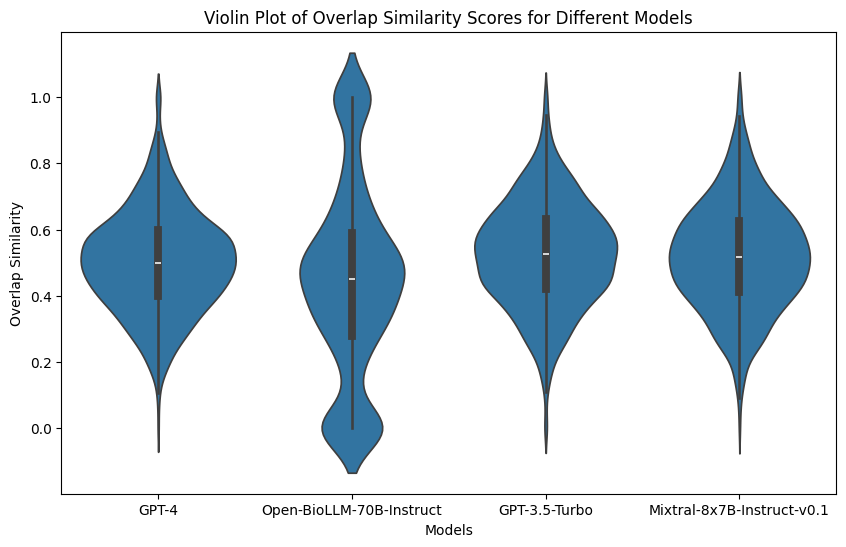

In [18]:
model_data = {
    "Model": ["GPT-4"] * len(gpt4['overlap_coefficient']) + ["Open-BioLLM-70B-Instruct"] * len(openbiodf['overlap_coefficient']) + ["GPT-3.5-Turbo"] * len(gpt3_5['overlap_coefficient']) + ["Mixtral-8x7B-Instruct-v0.1"] * len(mixtraldf['overlap_coefficient']),
    "Overlap Similarity": list(gpt4['overlap_coefficient']) + list(openbiodf['overlap_coefficient']) + list(gpt3_5['overlap_coefficient']) + list(mixtraldf['overlap_coefficient'])
}


plt.figure(figsize=(10, 6))
sns.violinplot(x="Model", y="Overlap Similarity", data=model_data)
plt.xlabel('Models')
plt.ylabel('Overlap Similarity')
plt.title('Violin Plot of Overlap Similarity Scores for Different Models')
plt.show()

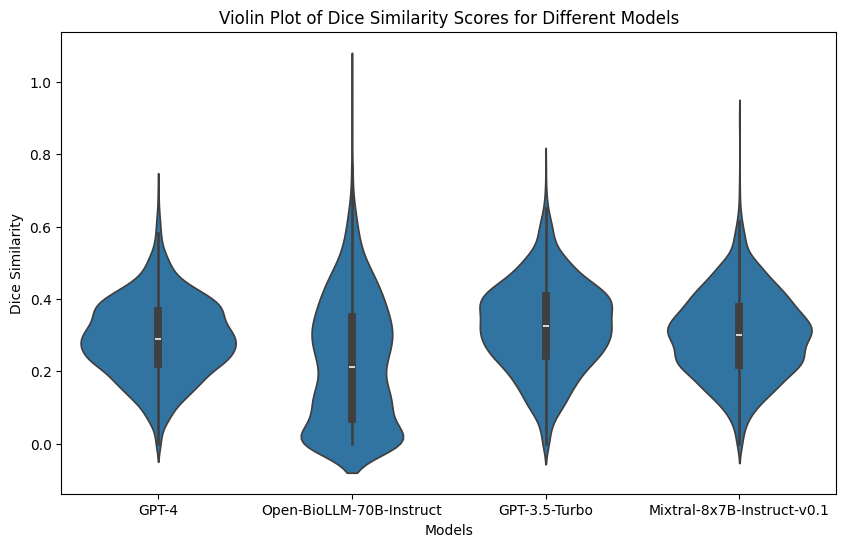

In [19]:
model_data = {
    "Model": ["GPT-4"] * len(gpt4['dice_coefficient']) + ["Open-BioLLM-70B-Instruct"] * len(openbiodf['dice_coefficient']) + ["GPT-3.5-Turbo"] * len(gpt3_5['dice_coefficient']) + ["Mixtral-8x7B-Instruct-v0.1"] * len(mixtraldf['dice_coefficient']),
    "Dice Similarity": list(gpt4['dice_coefficient']) + list(openbiodf['dice_coefficient']) + list(gpt3_5['dice_coefficient']) + list(mixtraldf['dice_coefficient'])
}


plt.figure(figsize=(10, 6))
sns.violinplot(x="Model", y="Dice Similarity", data=model_data)
plt.xlabel('Models')
plt.ylabel('Dice Similarity')
plt.title('Violin Plot of Dice Similarity Scores for Different Models')
plt.show()

In [20]:
#openbiodf.to_csv('/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/Llama3-OpenBioLLM-70B/Llama3-OpenBioLLM-70B_consistency.csv', index=False)
#gpt4.drop("jaccard", axis='columns')
#gpt4.to_csv('/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/gpt-4/gpt4_consistency.csv', index=False)
#mixtraldf.to_csv("/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/Mixtral-8x7B-Instruct-v0.1/Mixtral-8x7B-Instruct-v0.1_consistency.csv")
#gpt3_5.to_csv("/srv/essa-lab/flash3/cnimo3/work/reproduction/AfriMedQA/AfriMed-QA/results/gpt-3.5-turbo/gpt3_5_consistency.csv")

In [21]:
from semantic_text_similarity.models import WebBertSimilarity
from semantic_text_similarity.models import ClinicalBertSimilarity

In [22]:
bert_model = WebBertSimilarity(device='cuda', batch_size=10) #defaults to GPU prediction

clinical_model = ClinicalBertSimilarity(device='cuda', batch_size=10) #defaults to GPU prediction

/srv/essa-lab/flash3/cnimo3/miniconda3/envs/meditron/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [25]:
bert_sim_score = bert_model.predict([("She won an olympic gold medal","The women is an olympic champion")])[0]/5
print(bert_sim_score)

0.6015978336334229


In [28]:
bert_similarities = []
for output, rationale in zip(gpt4['outputs'], gpt4['rationale']):
    similarity = bert_model.predict([(output, rationale)])[0]/5
    bert_similarities.append(similarity)

gpt4['bert_sim'] = bert_similarities

In [ ]:
data = {
    "Model": ["GPT-4"] * len(gpt4['bert_sim']),
    "Semantic-Text Similarity": gpt4['bert_sim']
}


sns.violinplot(x="Model", y="Semantic-Text Similarity", data=data)
plt.xlabel('GPT-4 Model')
plt.ylabel('Semantic-Text Similarity')
plt.title('Violin Plot of Jaccard Similarity Scores for GPT-4 Model')
plt.show()